In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\马朝阳\Desktop\常用数据\hp_1_air_data8185\air_data.csv", encoding='utf-8')

In [2]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [3]:
explore = data.describe(percentiles=[], include='all').T
explore.head()

,count,unique,top,freq,mean,std,min,50%,max
MEMBER_NO,62988,NaN,NaN,NaN,31494.5,18183.2,1,31494.5,62988
FFP_DATE,62988,3068,2011/01/13,184,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/02/16,96,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988,NaN,NaN,NaN,4.10216,0.373856,4,4,6


In [4]:
from datetime import datetime

ffp = data['FFP_DATE'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d'))
ffp_year = ffp.map(lambda x: x.year)

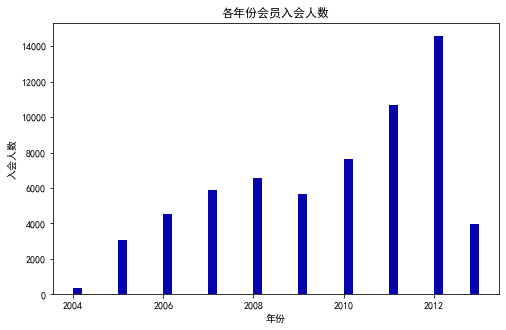

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.rcParams['font.sans-serif']= 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')
plt.show()


In [6]:
male=pd.value_counts(data['GENDER'])['男']
female=pd.value_counts(data['GENDER'])['女']

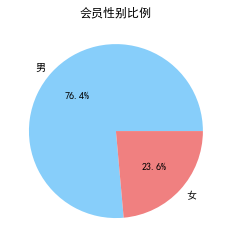

In [7]:
fig = plt.figure()
plt.pie([male, female], labels=['男', '女'], colors=['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%')
plt.title('会员性别比例')
plt.show()


In [8]:
pd.value_counts(data['GENDER'])

男    48134
女    14851
Name: GENDER, dtype: int64

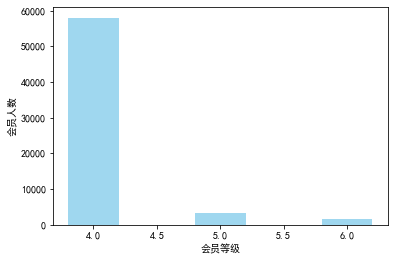

In [9]:
fig = plt.figure()
plt.bar(pd.value_counts(data['FFP_TIER']).index, pd.value_counts(data['FFP_TIER']).values,
        width=0.4, alpha=0.8, color='skyblue')
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.show()

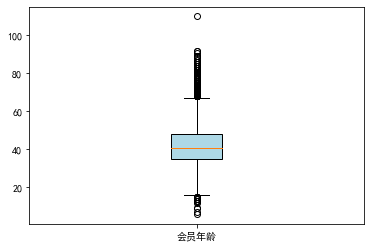

In [10]:
age = data['AGE'].dropna()
age = age.astype('int64')
plt.boxplot(age, patch_artist=True, labels=['会员年龄'], boxprops={'facecolor': 'lightblue'})
plt.show()


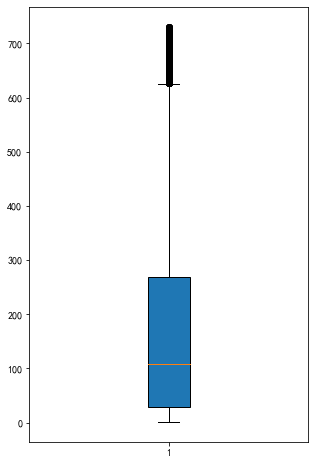

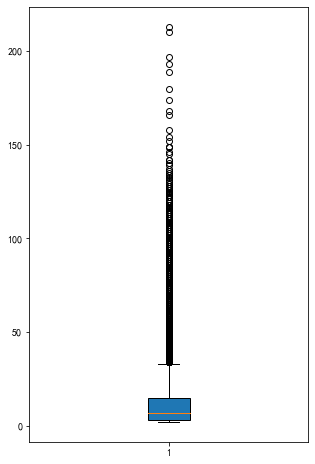

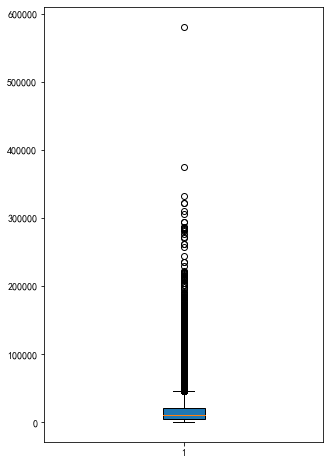

In [11]:
lte = data['LAST_TO_END']
fc = data['FLIGHT_COUNT']
skc = data['SEG_KM_SUM']
for i in [lte, fc, skc]:
    plt.figure(figsize=(5,8))
    plt.boxplot(i, patch_artist=True)
    plt.show()

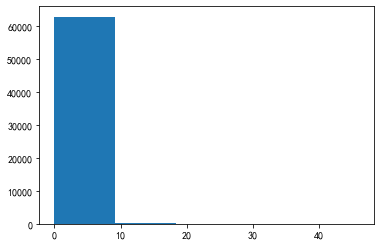

In [12]:
ec=data['EXCHANGE_COUNT']
plt.hist(ec,bins=5)
plt.show()

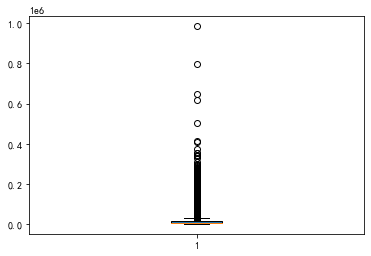

In [13]:
ps=data['Points_Sum']
plt.boxplot(ps,patch_artist=True)
plt.show()


In [14]:
data_corr = data[['FFP_TIER', 'FLIGHT_COUNT', 'LAST_TO_END', 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'Points_Sum']]
age1 = data['AGE'].fillna(0)
data_corr['AGE'] = age1.astype('int64')
data_corr['ffp_year'] = ffp_year

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
 
airline_data = pd.read_csv(r"C:\Users\马朝阳\Desktop\常用数据\hp_1_air_data8185\air_data.csv", encoding='utf-8')

airline_notnull = airline_data.loc[airline_data['SUM_YR_1'].notnull() & airline_data['SUM_YR_2'].notnull(), :]


In [16]:

index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0
index3 = (airline_notnull['SEG_KM_SUM'] > 0) & (airline_notnull['avg_discount'] != 0)

index4 = airline_notnull['AGE'] > 100
airline = airline_notnull[(index1 | index2) & (index3) & -index4]



In [17]:
airline.shape

(62043, 44)

In [18]:
airline_selection = airline[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]

In [19]:
airline_selection.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658


In [20]:
airline_selection['L1'] = pd.to_datetime(airline_selection['LOAD_TIME']) - pd.to_datetime(airline_selection['FFP_DATE'])
L = []
for i in airline_selection['L1']:
    a = int(str(i)[:4])/30
    L.append(a)
airline_selection['L'] = L
airline_selection.drop('L1', axis=1, inplace =True) # 删除中间变量
airline_selection.drop(airline_selection.columns[:2], axis=1, inplace =True) # 去掉不需要的u'LOAD_TIME', u'FFP_DATE'
airline_selection.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'},inplace=True)
airline_selection.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,R,F,M,C,L
0,1,210,580717,0.961639,90.200000
1,7,140,293678,1.252314,86.566667
2,11,135,283712,1.254676,87.166667
3,97,23,281336,1.090870,68.233333
4,5,152,309928,0.970658,60.533333


In [21]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])


d = airline_selection.apply(f)
d

,R,F,M,C,L
min,1,2,368,0.136017,12.166667
max,731,213,580717,1.500000,114.566667


In [22]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(airline_selection)
data = StandardScaler().fit_transform(airline_selection)
data = pd.DataFrame(data)
data.columns = ['Z' + i for i in airline_selection.columns]
data = data.iloc[:, [4, 0, 1, 2, 3]]

In [23]:
from sklearn.cluster import KMeans

k = 5
kmeans_model = KMeans(n_clusters=k, random_state=123)
fit_kmeans = kmeans_model.fit(data.values)


In [24]:
kmeans_cc=kmeans_model.cluster_centers_
print('各聚类中心为:\n',kmeans_cc)

kmeans_labels=kmeans_model.labels_
print('各类别的类别标签为：\n',kmeans_labels)

各聚类中心为:
 [[ 1.16108399e+00 -3.77499994e-01 -8.65189669e-02 -9.44338125e-02
  -1.57047742e-01]
 [ 4.30744744e-02 -1.70312626e-03 -2.32695277e-01 -2.36587633e-01
   2.17138891e+00]
 [-7.00326044e-01 -4.15377753e-01 -1.60648047e-01 -1.60390485e-01
  -2.57380124e-01]
 [ 4.83304628e-01 -7.99421213e-01  2.48303869e+00  2.42388525e+00
   3.10034088e-01]
 [-3.13136330e-01  1.68641023e+00 -5.73859336e-01 -5.36663736e-01
  -1.75973079e-01]]
各类别的类别标签为：
 [3 3 3 ... 2 4 4]


In [25]:
r1 = pd.Series(kmeans_model.labels_).value_counts()
print('最终每个类别的数目为：\n', r1)

最终每个类别的数目为：
 2    24617
0    15727
4    12115
3     5337
1     4247
dtype: int64


In [26]:
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_, columns=['ZL', 'ZR', 'ZF', 'ZM', 'ZC'])
cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:, 0]


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

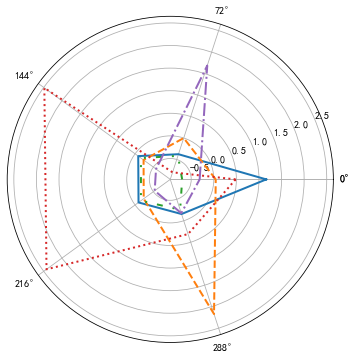

In [27]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['ZL', 'ZR', 'ZF', 'ZM', 'ZC']
legen = ['客户群' + str(i + 1) for i in cluster_center.index]
lstype = ['-', '--', (0, (3, 5, 1, 5, 1, 5)), ':', '-.']
kinds = list(cluster_center.iloc[:, 0])
cluster_center=pd.concat([cluster_center,cluster_center[['ZL']]],axis=1)
centers=np.array(cluster_center.iloc[:,0:])
n=len(labels)
angle=np.linspace(0,2*np.pi,n,endpoint=False)
angle=np.concatenate((angle,[angle[0]]))
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,polar=True)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
for i in range(len(kinds)):
    ax.plot(angle,centers[i],linestyle=lstype[i],linewidth=2,label=kinds[i])
ax.set_thetagrids(angle*180/np.pi,labels)
plt.show()

In [ ]:
angle

In [ ]:
centers